In [100]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

# Enter Twitter API Keys
access_token = "Secret"
access_token_secret = "Secret"
consumer_key = "Secret"
consumer_secret = "Secret"

# Create tracklist with the words that will be searched for
tracklist = '#Applesucks'
# Initialize Global variable
tweet_count = 0
# Input number of tweets to be downloaded
n_tweets = 1000

outfile = "Apple_data.txt"
file_write = open(outfile, "w+")


# Create the class that will handle the tweet stream
class StdOutListener(StreamListener):
      
    def on_data(self, data):
        
        global tweet_count
#         print(tweet_count)
        global n_tweets
        global stream
        if tweet_count < n_tweets:
#             print(tweet_count)
#             print(data)
            file_write.write(data)
            tweet_count += 1
            return True
        else:
            stream.disconnect()

    def on_error(self, status):
        print(status)

if __name__ == '__main__':  
# Handle Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)
    stream.filter(track=tracklist)

file_write.close()
    


In [101]:
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
#from wordcloud import WordCloud

#Reading the raw data collected from the Twitter Streaming API using #Tweepy. 
tweets_data = []
tweets_data_path = 'Apple_data.txt'
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
        print(tweet['source']) 
    except:
        continue
        
#Error codes from the Twitter API can be inside the .txt document, #take them off
tweets_data = [x for x in tweets_data if not isinstance(x, int)]


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://spain.staging.newspress-es.com" rel="nofollow">Newspress Test</a>
<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
<a href="http://www.tweetcaster.com" rel="nofollow">TweetCaster for Android</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a hr

In [102]:
#Create function for taking the most used Tweet sources off the #source column 
def reckondevice(tweet):
    try:
        if 'iPhone' in tweet['source'] or ('iOS' in tweet['source']):
            return 'iPhone'
        elif 'Android' in tweet['source']:
            return 'Android'
        elif 'Mobile' in tweet['source'] or ('App' in tweet['source']):
            return 'Mobile device'
        elif 'Mac' in tweet['source']:
            return 'Mac'
        elif 'Windows' in tweet['source']:
            return 'Windows'
        elif 'Bot' in tweet['source']:
            return 'Bot'
        elif 'Web' in tweet['source']:
            return 'Web'
        elif 'Instagram' in tweet['source']:
            return 'Instagram'
        elif 'Blackberry' in tweet['source']:
            return 'Blackberry'
        elif 'iPad' in tweet['source']:
            return 'iPad'
        elif 'Foursquare' in tweet['source']:
            return 'Foursquare'
        else:
            return 'Other'
    except:
        return 'Other'
    
for tweet in tweets_data:
    print(reckondevice(tweet))

1000
iPhone
Android
Mobile device
Android
Android
Android
Android
Android
Other
Android
Android
iPhone
Mobile device
iPhone
Android
Android
iPhone
Android
Mobile device
iPhone
Mobile device
Android
Android
iPhone
Android
iPhone
iPhone
Mobile device
Android
Mobile device
iPhone
Android
iPhone
Android
iPhone
Android
iPhone
iPhone
iPhone
Android
Android
Other
Android
Android
iPhone
iPhone
Android
Android
Android
iPhone
Other
Android
Other
iPhone
Android
Android
Android
iPhone
iPhone
Android
iPhone
iPhone
iPad
Android
iPhone
Android
Android
Mobile device
Mobile device
Android
Android
Android
iPhone
iPhone
Android
iPhone
iPhone
iPhone
iPhone
iPhone
Other
Other
Android
Android
iPhone
Android
Android
Android
iPhone
Android
Other
Mobile device
iPhone
iPhone
Android
Android
Android
iPhone
Other
Other
Android
Other
Android
iPhone
Android
Instagram
iPhone
Android
Android
iPhone
iPhone
Android
Mobile device
iPhone
iPhone
Android
iPhone
Android
Android
iPad
Android
Android
Android
iPad
Android
Mobi

In [103]:
def text(tweet):
    try:
#         print(len(tweet['text']))
        return tweet['text']
    except:
        return None
        

In [110]:
#Convert the Tweet JSON data to a pandas Dataframe, and take the #desired fields from the JSON. More could be added if needed.
tweets = pd.DataFrame()
# tweets['text'] = list(map(lambda tweet: tweet['text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], tweets_data))
tweets['text'] = list(map(text, tweets_data))
tweets['device'] = list(map(reckondevice, tweets_data))

In [105]:
#Now lets explore the different devices where the tweets are #produced from and plot these results
devices = tweets.groupby('device')
devicecount = devices['text'].count()
print(devicecount)
#Same procedure as the for the mentions, hashtags, etc..
device_dict = devicecount.to_dict()
device_ordered_list =sorted(device_dict.items(), key=lambda x:x[1])
device_ordered_list = device_ordered_list[::-1]
device_dict_values = []
device_dict_keys = []
for item in device_ordered_list:
    device_dict_keys.append(item[0])
    device_dict_values.append(item[1])

device
Android          433
Bot                1
Instagram          7
Mobile device    101
Other             32
Web                5
iPad              10
iPhone           392
Name: text, dtype: int64


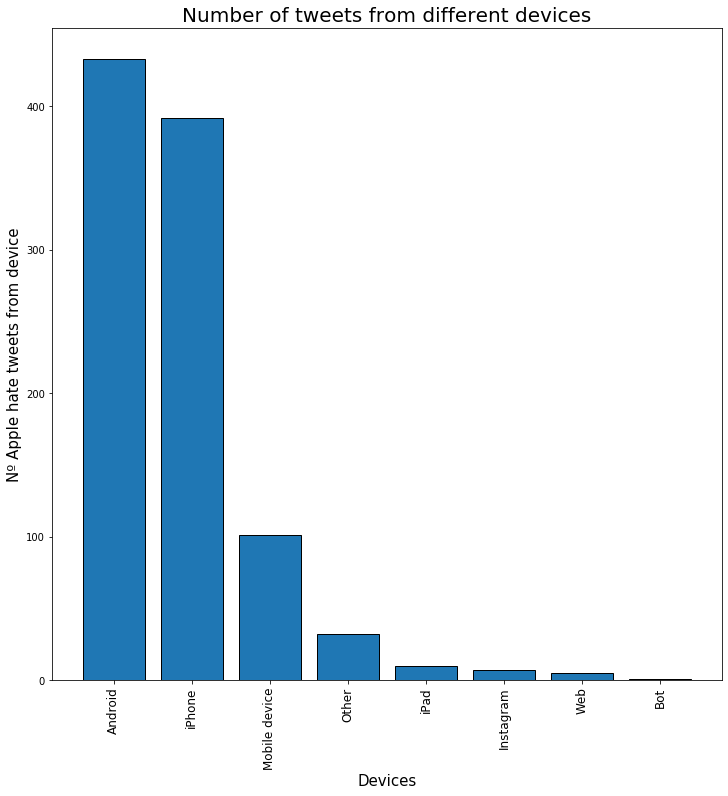

In [111]:
fig = plt.figure(figsize = (12,12))
index = np.arange(len(device_dict_keys))
plt.bar(index, device_dict_values, edgecolor = 'black', linewidth=1)
plt.xlabel('Devices', fontsize = 15)
plt.ylabel('Nº Apple hate tweets from device', fontsize=15)
plt.xticks(index, list(device_dict_keys), fontsize=12, rotation=90)
plt.title('Number of tweets from different devices', fontsize = 20)

plt.show()

In [ ]:
# Question: What type of devices do apple haters use to tweet in hashtag #Applesucks?
# Answer: Almost all the users use mobile devices to tweet in hashtag #Applesucks. 
#         The number of users who use Adrioid to critic Aplle is just a little higher than the number of people who use iPhone.

# Cite: https://towardsdatascience.com/visualization-of-information-from-raw-twitter-data-part-1-99181ad19c
#         https://towardsdatascience.com/visualisation-of-information-from-raw-twitter-data-part-2-11707a65e920
#         https://towardsdatascience.com/downloading-data-from-twitter-using-the-rest-api-24becf413875
#         https://medium.com/@jaimezornoza/downloading-data-from-twitter-using-the-streaming-api-3ac6766ba96c